<a href="https://colab.research.google.com/github/KhoaKD59/HomeworkW42023/blob/main/PathWater_AI_for_FuzzyLogic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

74.9705859823484


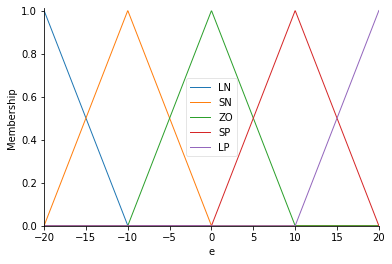

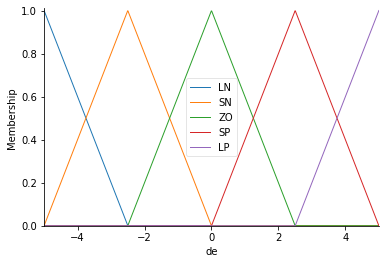

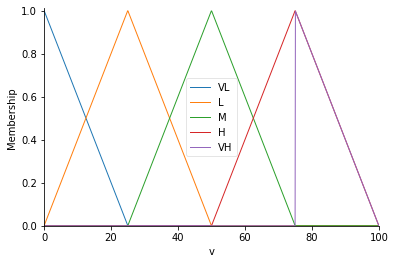

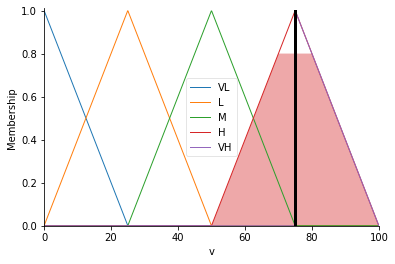

In [5]:
#pip install scikit-fuzzy
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import numpy as np
import matplotlib.pyplot as plt
# gọi hàm nhập giá trị errol
# Input
e  = ctrl.Antecedent(np.linspace(-20, 20, 1000), 'e') # errol
de = ctrl.Antecedent(np.linspace(-5, 5, 1000), 'de')  # d(errol)
# giá trị mức nước
# Output 
v = ctrl.Consequent(np.linspace(0, 100, 1000), 'v')

# Membership functions
# tao ham cho tung member
# add mức độ thành viên cho từng mức 
e['LN'] = fuzz.trimf(e.universe,[-20, -20, -10])
e['SN'] = fuzz.trimf(e.universe,[-20, -10, 0])
e['ZO'] = fuzz.trimf(e.universe,[-10, 0, 10])
e['SP'] = fuzz.trimf(e.universe,[0, 10, 20])
e['LP'] = fuzz.trimf(e.universe,[10, 20, 20])

de['LN'] = fuzz.trimf(de.universe,[-5, -5, -2.5])
de['SN'] = fuzz.trimf(de.universe,[-5, -2.5, 0])
de['ZO'] = fuzz.trimf(de.universe,[-2.5, 0, 2.5])
de['SP'] = fuzz.trimf(de.universe,[0, 2.5, 5])
de['LP'] = fuzz.trimf(de.universe,[2.5, 5, 5])

v['VL'] = fuzz.trimf(v.universe,[ 0,  0,  25])
v['L']  = fuzz.trimf(v.universe,[ 0, 25,  50])
v['M']  = fuzz.trimf(v.universe,[25, 50,  75])
v['H']  = fuzz.trimf(v.universe,[50, 75, 100])
v['VH'] = fuzz.trimf(v.universe,[75, 75, 100])

# Rules
rule = []#viết luật cho CT
#Xây dựng luật cho thời gian vfast


rule.append(ctrl.Rule(e['LN'] & de['LN'], v['VH']))
rule.append(ctrl.Rule(e['LN'] & de['SN'], v['VH']))
rule.append(ctrl.Rule(e['LN'] & de['ZO'], v['H']))
rule.append(ctrl.Rule(e['LN'] & de['SP'], v['H']))
rule.append(ctrl.Rule(e['LN'] & de['LP'], v['M']))

rule.append(ctrl.Rule(e['SN'] & de['LN'], v['VH']))
rule.append(ctrl.Rule(e['SN'] & de['SN'], v['H']))
rule.append(ctrl.Rule(e['SN'] & de['ZO'], v['H']))
rule.append(ctrl.Rule(e['SN'] & de['SP'], v['M']))
rule.append(ctrl.Rule(e['SN'] & de['LP'], v['L']))


rule.append(ctrl.Rule(e['ZO'] & de['LN'], v['H']))
rule.append(ctrl.Rule(e['ZO'] & de['SN'], v['H']))
rule.append(ctrl.Rule(e['ZO'] & de['ZO'], v['M']))
rule.append(ctrl.Rule(e['ZO'] & de['SP'], v['L']))
rule.append(ctrl.Rule(e['ZO'] & de['LP'], v['L']))

rule.append(ctrl.Rule(e['SP'] & de['LN'], v['M']))
rule.append(ctrl.Rule(e['SP'] & de['SN'], v['M']))
rule.append(ctrl.Rule(e['SP'] & de['ZO'], v['L']))
rule.append(ctrl.Rule(e['SP'] & de['SP'], v['L']))
rule.append(ctrl.Rule(e['SP'] & de['LP'], v['VL']))

rule.append(ctrl.Rule(e['LP'] & de['LN'], v['L']))
rule.append(ctrl.Rule(e['LP'] & de['SN'], v['L']))
rule.append(ctrl.Rule(e['LP'] & de['ZO'], v['L']))
rule.append(ctrl.Rule(e['LP'] & de['SP'], v['VL']))
rule.append(ctrl.Rule(e['LP'] & de['LP'], v['VL']))


#Control system  (Thống nhất luật)
valve_control = ctrl.ControlSystem(rule)
valve_simulation = ctrl.ControlSystemSimulation(valve_control)

e.view()
de.view()
v.view()



# Compute
valve_simulation.input['e'] = -10
valve_simulation.input['de'] = -2

valve_simulation.compute()

print(valve_simulation.output['v'])

# Valve
v.view(sim = valve_simulation)